<h1> 9. Modelos ARIMA </h1>

In [10]:
library(fpp3)
library(readr)
library(tseries)
library(dplyr)
library(ggplot2)
library(zoo)
library(quantmod)
library(forecast)
library(slider)
library(tidyverse)
library(TTR) #Para medias moviles

In [2]:
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")
Ton_Netas_P <- Ton_Netas_P[-99,]
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1],  frequency = 12, star = c(2014,1))

Los modelos **ARIMA** proporcionan otro enfoque para el pronóstico de series de tiempo. El suavizado exponencial y los modelos ARIMA son los dos enfoques más utilizados para el pronóstico de series de tiempo y brindan enfoques complementarios al problema.  Mientras que los modelos de suavizado exponencial se basan en una descripción de la tendencia y la estacionalidad de los datos, los modelos ARIMA pretenden describir las autocorrelaciones de los datos.

Antes de presentar los modelos ARIMA, primero debemos analizar el concepto de estacionariedad y la técnica de diferenciación de series de tiempo..

<h2> 9.1 Estacionariedad y diferenciación </h2>

Una **serie de tiempo estacionaria** es aquella cuyas propiedas estadística no dependen del tiempo en el que se observa la serie. Por lo tanto, las series de tiempo con tendencias, o con estacionalidad, NO son estacionarias: la tendencia y la estacionalidad afectarán el valor de la serie de tiempo en diferentes momentos. Por otro ldo, una **serie de ruido blanco** es Estacionaria, debería verse igual en cualquier momento. 

Algunos casos pueden ser confusos: una serie temporal con un comportamiento cíclico (pero sin tendencia ni estacionalidad) es estacionaria. Esto se debe a que los ciclos no tienen una duración fija, por lo que antes de observar la serie no podemos estar seguros de donde estarán los picos y valles de los ciclos.

En general, una **serie de tiempo estacionaria** NO tendrá patrrones predecibles a largo plazo. Los diagramas de tiempo mostrarán que la serie es más o menos horizontal (aunque es posible algún comportamiento cíclico), con varianza constante.

Las transformaciones suelen ser útiles para estabilizar una serie antes de estimar modelos. Esto es especialemnte importante para modelos $ARIMA$, que necesitan que la series sean **estacionarias** antes de estimar los modelos. Aunque la mayoría de las series NO son estacionariaas, $ARIMA$ es eficaz siempre y cuando la serie se pueda convertir en estacionaria mediante la aplicación de transformaciones tales como el *logaritmo natural*, la *diferenciación* o la *diferenciación estacional*


Las transformaciones como logaritmos pueden ayudar a estabilizar la varianza de una serie temporal. La **diferenciación** puede ayudar a estabilizar la media de una sere temporal eliminando los cambios en el nivel de una serie temporal y, por lo tanto, eliminando (o reduciendo) la tendencia y estacionalidad. Además de la gráfica de tiempo de los datos, la gráficaa $ACF$ también es útil para identificar series de tiempo NO estacionarias. Para una serie de tiempo estacionaria, el $ACF$ caerá a $0$ relativamente rápido, mientras que el $ACF$ de datos NO estacionarios disminuye lentamente. Además, para datos NO estacionarios, el valor de $\varphi _1$ suele ser grande y positivo

<h3> 9.1.1 Modelo de paseo aleatorio </h3>

La serie diferenciada es el *cambio* entre observaciones consecutivas en la serie original y se puede escribir como:
$$y_t ^{\; \prime}=y_t-y_{t-1} $$ La serie diferenciada solo tendra $T-1$ valores, ya que no es posible calcular una diferencia $y_t ^{\; \prime}$ para la primera observación.

Cuando la serie diferenciada es ruido blanco, el modelo de la serie original se puede escribir como :
$$y_t-y_{t-1}=\varepsilon _t$$ Donde $\varepsilon _t$ denota ruido blanco. Reorganizar esto conduce al modelo de "caminata aleatoria" $$y_t=y_{t-1}+\varepsilon _t$$  Los modelos de paseo aleatorio se utilizan ampliamente para datos NO estacionarios, en particular datos financieros y económicos. Los paseos aleatorios suelente tener: 
* Largos períodos de tendencias aparentes hacía arriba o hacia abajo.
* Cambios de dirección repentinos e impredecibles.

Los pronósticos de un modelo de caminata aleatoria son iguales a la última observación, ya que los movimientos futuros son impredecibles y es igualmente probable que sean haacía arriba o hacía abajo. Por lo tanto, el modelo de caminata aleatoria respalda los **pronósticos ingenuos**.

Un modelo estrechamente relacionado permite que las diferencias tengan una media distinta de cero. Entonces:

$y_t-y_{t-1}=c+\varepsilon _t \; $   o   $ \; y_t=y_{t-1}+\varepsilon _t+c$



El valor de $c$ es el promedio de los cambios entre observaciones consecutivas. Si $c$ es positivo, entonces el cambio promedio es un aumento en el valor de $y_t$. Por lo tanto, si $y_t$ tenderá  desplazarse hacía arriba. Sin embargo, si $c$ es negativo, tenderá a descender.
<h3> 9.1.2 Diferenciación de segundo orden </h3>

Ocasionalmente, los datos diferenciados no parecerán estacionarios y puede ser necesario diferenciar los datos por segunda vez para obtener una serie estacionaria: $$\begin{array}{l} y_t ^ {\; \prime \prime }&=y_t ^{\; \prime }-y^{\; \prime }_{t-1} \\ y_t ^ {\; \prime \prime }&=(y_t-y_{t-1})-(y_{t-1}-y_{t-2})  \\ y_t ^ {\; \prime \prime }&=y_t-2y_{t-1}+y_{t-2} \end{array}    $$
En este caso, $y_t ^{\; \prime \prime }$ tendrá $T-2$ valores. Luego, modelaríamos el "cambio en los cambios", de los datos originales. En la práctica, casi nunca es necesario ir más allá de las diferencias de segundo orden.


<h3> 9.1.2 Diferenciación estacional </h3> 

Una diferencia estacional es la diferencia entre una observación y la observación anterior de la misma temporadaa. Entonces $$y_t^ {\; \prime} =y_t-t_{t-m}$$ Donde $m=$ el número de estaciones. Estos también se denominan **"lag-m diferencias"** ya que restamos la observación después de un retraso de $m$ períodos.

Si los datos con diferencias estacionales parecen ruido blanco, entonces un modelo apropiado para los datos originales es: $$y_t=y_{t-m}+\varepsilon _t$$ Los pronósticos de este modelo son iguales a la última observación de la temporada relevante. Es decir, este modelo proporciona pronósticos ingenuos estacionales.

Nota: Las diferencias estacionales elimina la estacionalidad y la tendencia.

Para distinguir las **diferencias estacionales** de las **diferencias ordinarias**, a veces nos referimos a las diferencias ordinarias como "primeras diferencias", es decir diferencias en el desasfase $1$.
A veces es necesario tomar tanto una diferencia estacional como una primera diferencia para obtener datos estacionarios.

Si $y_t^{\; \prime} =y_t-y_{t-m}$ denota una serie diferenciada estacionalmente, entonces la serie diferenciada estacionalmente dos veces es: 
$$\begin{array}{l} y_t ^ {\; \prime \prime }&=y_t ^{\; \prime }-y^{\; \prime }_{t-1} \\ y_t ^ {\; \prime \prime }&=(y_t-y_{t-m})-(y_{t-1}-y_{t-m-1})  \\ y_t ^ {\; \prime \prime }&=y_t-y_{t-1}-y_{t-m}+y_{t-m-1} \end{array}    $$ Cuando se aplican tanto las diferencias estacionales como las primeras, no importa cual se haga primero; el resultado será el mismo. Sin embargo, si los datos tienen un fuerte patrón estacional, recomendamos que primero se realice la diferenciación estacional, porque la serie resultante a veces será estacionaria y no habrá necesidad de una primera diferencia adicional. Si primero se hace la primera diferenciación, todavía habrá estacionalidad presente.

Tenga en cuenta que aplicar más diferencias de las requeridas inducirá dinámicas falsas o autocorrelaciones que realmente no existen en la serie temporal. Por lo tanto, **haga la menor cantidad de diferencias necesarias para obtener una serie estacionaria.**

Es importante que si se utiliza la diferenciación las diferencias sean interpretables. Las **primeras diferencias** son el cambio entre una observación y la siguiente. Las **diferencias estacionales** son el cambio entre un año y el siguiente. Es poco probable que otros retrasos tengan mucho sentido interpretable y deben evitarse.

<h2> 9.2 Pruebas de raíz unitarias </h2> 

Una forma de determinar más objetivamente si se requiere una diferenciación es usar una **prueba de raíz unitaria**. Estas son pruebas de hipótesis estadísticas de estacionariedad que están diseñadas para determinar si se requiere diferenciación.

Hay varías pruebas de raíz unitaria disponibles, que se basan en diferentes suposiciones y pueden dar lugar a respuestas contradictorias. 

Recordemos que:

* Si $p-valor<\alpha $ **Rechazamos $H_0$**
* Si $p-valor>\alpha $ **Aceptamos $H_0$**

<h3> 9.2.1 Prueba de Kwiatkowski-Phillips-Schamidt-Shin (KPSS) </h3>

Utilizamos la **prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)**. En esta prueba:

* $H_0:$ Datos estacionarios 
* $H_a:$ Datos NO estacionarios

En consecuencia, los $p-valor<0.05$ sugieren que se requiere una diferenciación . La prueba se puede calcular usando la función **unitroot_kpss()**

In [3]:
unitroot_kpss(Maiz_ts)

kpss_stat kpss_pvalue 
 0.72798312  0.01100153

En este caso como $p-valor<0.05$, ya que $0.0110015<0.05$, entonces **Rechazamos $H_0$** y **Aceptamos $H_a$**. Por lo tanto, tenemos una **Serie NO estacionaria**

<h3> 9.2.2 Prueba de Dickey-Fuller Aumentada </h3>

Utilizamos la **Dickey-Fuller Aumentada**. En esta prueba:

* $H_0:$ Datos NO estacionarios 
* $H_a:$ Datos estacionarios

In [4]:
adf.test(Maiz_ts, alternative = "stationary",k=0)

Warning message in adf.test(Maiz_ts, alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Maiz_ts
Dickey-Fuller = -5.1793, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


En este caso como $p-value<0.05$, ya que $0.01<0.05$, entonces **Aceptamos $H_a$**, concluimos que tenemos una **serie estacionaria**


Siempre es mejor aplicar ambas pruebas, de modo que se pueda asegurar que la serie es realmente estacionaria. Los posibles resultados de aplicr estas pruebas estacionarias son los siguientes:
1. Ambas pruebas concluyen que la serie NO es estacionaria, por lo tanto tenemos una **serie NO estacionaria.**
2. Ambas pruebas concluyen que la serie es estacionaria, por lo tanto tenemos una **serie estacionaria.**
3. $KPSS$ indica estacionariedad y $ADF$ indica NO estacionariedad, por lo tanto **La serie es tendencia estacionaria**. La tendencia debe eliminarse para que la serie sea estrictamente estacionaria. Se compruba la estacionariedad de la serie sin tendenciaa.
4. $KPSS$ indica NO estacionariedad y $ADF$ indica estacionariedad, por lo tanto **la serie es estacionaria en diferencia**. La diferenciación se nutilizará para hacer que la serie sea estacionaria. Se comprueba la estacionariedad de la serie diferenciada.


**Conclusión:**

Su utilizan dos pruebas para comprobar la estacionariedad de una serie temporal, a saber, la prueba $ADF$ y a prueba $KPSS$. La eliminación de la tendencia se convierten en series de tiempo estacionarias estrictas. El modelo de pronóstico requerido ahora se puede aplicar en una serie de datos de tiempo estacionarios.


Dado la prueba $KPSS$ podemos diferenciar los datos y volver a aplicar la prueba.

**Prueba de estacionariedad KPSS**

In [5]:
Maiz_ts_diff <- diff(Maiz_ts, differences =1) #Hacemos una serie de tiempo aplicada ya primera diferencia 
unitroot_kpss(Maiz_ts_diff)

kpss_stat kpss_pvalue 
 0.03898279  0.10000000

En esta ocasión, dada la primera diferencia, tenemos que $p-valor>\alpha $, ya que $0.1>0.05$, con esto tenemos que **Aceptamos $H_0$**. Por lo tanto, tenemos una **serie estacionaria**.  

**Prueba de Dickey-Fuller Aumentada**

In [6]:
adf.test(Maiz_ts_diff, alternative = "stationary",k=0)

Warning message in adf.test(Maiz_ts_diff, alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Maiz_ts_diff
Dickey-Fuller = -11.657, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


En la prueba de Dickey-Fuller Aumentada, con la primera diferencia tenemos que $p-valor<\alpha $, ya que $0.01<0.05$, con esto tenemos que **Aceptamos $H_a$**. Por lo tanto, tenemos una **serie estacionaria.**

Como ambas pruebas concluyen que la serie es estacionaria, entonces concluimos que la **serie es estacionaria con $1$ diferencia**.

Este proceso de usar una secuencia de pruebas $KPSS$ para determinar el número apropiado de primeras diferencias se lleva a cabo usando **unitroot_ndiffs()**. <br>
Una función similar para determinar si se requieren diferencias estacionales es **unitroot_nsdiffs()**

In [7]:
unitroot_ndiffs(Maiz_ts) #Nos dice cuantas diferencias ordinarias necesitamos.
unitroot_nsdiffs(Maiz_ts) #Nos dice cuantas diferencias estacionales necesitamos.

ndiffs 
     1

nsdiffs 
      0

No se sugieren diferencias estacionales si $F_s<0.64$, de lo contrario, se sugiere una diferencia estacional.

Más precisamente, si {$ y_t $} es una serie de tiempo **estacionaria**, entonces para toda $s$, la distribución de $(y_t,\ldots ,y_{t+s})$ no depende de $t$.

<h2> 9.3 Notación de retroceso </h2>

El operador de desplazamiento hacía atrás $B$ es una notación útil cuando se trabaja con rezagos de series de tiempo: $$By_t=y_{t-1}$$  Algunas referencias usan $L$ por "lag" (retraso) en lugar de $B$ por "backshift" (retroceso). En otra palabras, $B$, operando en $y_t$, tiene el efecto de desplazar los datos un período hacía atrás.  

Dos aplicaciones de $B$ a $y_t$ desplazan los datos dos períodos hacía atrás: $$ \begin{array}{l} B(By_t)&=B^2y_t \\ B(By_t)&=y_{t-2} \end{array}$$ 
Para datos mensuales, si deseamos considerar "el mismo mes del año pasado", la notación es $B^{12}y_t=y_{t-12}$ 

El operador de desplazamiento hacía atrás es conveniente para describir el proceso de **diferenciación**. Una primera diferencia se puede escribir como: $$\begin{array}{l} y_t^{\; \prime }&=y_t-y_{t-1}\\ y_t^{\; \prime }&=y_t-By_t \\ y_t^{\; \prime }&=(1-B)y_t \end{array} $$
Así que una primera diferencia puede ser representada por $(1-B)$. De manera similar, si se tienen que calcular diferencias de segundo orden , entonces:
$$\begin{array}{l} y_t ^{\; \prime \prime }&=y_t-2y_{t-1}+y_{t-2}\\ y_t ^{\; \prime \prime }&=(1-2B+B^2)y_t \\ y_t ^{\; \prime \prime }& =(1-B)^2y_t \end{array} $$
En general, una diferencia de orden $d$-ésimo se puede escribir como: $$(1-B)^dy_t$$

La notación de retroceso es particularmente útil cuando se conbinan diferencias, ya que el operador puede tratarse utilizando reglas algebraicas ordinarias. En particular, los términos que involucran $B$ se pueden multiplicar entre sí. 

Por ejemplo, una diferencia estacional seguida de una primera diferencia se puede escribir como:
$$\begin{array}{l} (1-B)(1-B^m)y_t&=(1-B-B^m+B^{m+1})y_t  \\ (1-B)(1-B^m)y_t &= y_t-y_{t-1}-y_{t-m}+y_{t-m-1} \end{array} $$

<h2> 9.4 Modelos autorregresivos </h2>

En un modelo de autorregresión, pronosticamos la variable de interés usando una combinación lineal de *valores pasados de la variable*. El término *autorregresión* indica que se trata de una regresión de la variable contra sí misma. Por lo tanto, un modelo autorregresivo de orden $p$ se puede escribir como: $$y_t=c+\Phi _1y_{t-1}+\Phi y_{t-2}+\cdots + \Phi _py_{t-p}+\varepsilon _t $$

donde $\varepsilon _t$ es ruido blanco. Esto es como una regresión múltiple pero con *valores rezagados* de $y_t$ como predictores. Nos referimos a esto como un modelo $AR(p)$, un modelo autorregresivo de orden $p$. Los modelos autorregresivos son notablemente flexibles en el manejo de una amplia gama de patrones de series de tiempo diferentes.

Para un modelo $AR(1)$
* Cuando $\Phi _1=0$ y $c=0$, $y_t$ es equivalente a ruido blanco.
* Cuando $\Phi _1=1$ y $c=0$, $y_t$ es equivalente a un paseo aleatorio.
* Cuando $\Phi _1=1$ y $c\neq 0$, $y_t$ es equivalente a un paseo aleatorio con deriva.
* Cuando $\Phi _1<0$, $y_t$ tiende a oscilar alrededor de la media.

Normalmente retringimos los modelos autorregresivos a datos estacionarios, en cuyo caso se requieren aalgunas restricciones en ñps valores de los parámetros. 
* Para un modelo $AR(1)$: $-1<\Phi _1<1$
* Para un modelo $AR(2)$: $-1<\Phi _2<1 $ ,  $ \Phi _1+\Phi _2<1 $ , $ \Phi _2-\Phi _1<1$

Cuando $p\geq 3$, las restricciones se vuelven mucho más complicadas.

<h2> 9.5 Modelos de promedio Móvil </h2>

En lugar de usar valores pasados de la variable de pronóstcio en una regresión, un modelo de promedio móvil usa errores de pronóstico pasados en un modelo similar a una regresión: $$y_t =c+\theta _1\varepsilon _{t-1}+\theta _2\varepsilon _{t-2}+\cdots +\theta _q\varepsilon _{t-q}+\varepsilon _t $$ Donde $\varepsilon _t$ es ruido blanco. Nos referimos a esto como un $Ma(q)$ modelo, un modelo de media móvil de orden $q$. Por supuesto, no observamos los valores de $\varepsilon _t$, por lo que no es realmente una regresión en el sentido habitual.

Observe que cda valor de $y_T$ se puede considerar como un rpomedio móvil ponderado de los últimos errores de pronóstico (aunque los coeficientes normalmente no suman uno). Sin embargo, los modelos de promedio móvil no deben confundirse con el suavizado de promedio móvil. Un **modelo de promedio móvil** se usa para pronosticar valores futuros, mientras que el **suavizado de promedio móvil** se usa para estimar el ciclo de tendencia de valores pasados. 

Cambiar los parámetros $\theta _1, \theta _2 , \ldots , \theta _q$ da como resultado diferentes patrones de series de tiempo. Al igual que con los modelos autorregresivos, la varianza del término error $\varepsilon _t$ solo cambiará la escala de la serie, no los patrones.

Es posible escribir cualquier $AR(p)$ estacionario como modelo $MA(\infty )$. Por ejemplo, usando sustitución repetida, podemos deostrar esto para un modelo $AR(1)$:
$$\begin{array}{l} y_t  =& \Phi _1y_{t-1}+\varepsilon _t   \\ y_t  =&\Phi _1 (\Phi _1 y_{t-2}+\varepsilon _{t-1}) +\varepsilon _t \\ y_t =& \Phi ^2 y_{t-2}+\Phi _1 \varepsilon _{t-1}+\varepsilon _t  \\ 
y_t =&\Phi ^3y_{t-3}+\Phi _1^2\varepsilon _{t-2}+\Phi _1 \varepsilon _{t-1}+\varepsilon _t  \\ etc& \end{array}$$
Previsto $-1<\Phi _1 <1$. El valor de $\Phi _1^k$ se hará más pequeñp a medida que $k$ se hace más grande. Entonces finalmente obtenemos: $$y_t=\varepsilon _t+\Phi _1\varepsilon _{t-1}+\Phi _1^2 \varepsilon _{t-2}+\Phi _1^3 \varepsilon _{t-3}+\cdots $$ Un $MA(\infty )$ proceso.

El resultado inverso se cumple si imponemos algunas restricciones a los parámetros de $MA$. Entonces el modelo $MA$ se llama **invertible**. Los modelos invertibles no se introducen simplemente para permitirnos convertir los modelos $MA$ a modelos $AR$. También tienen algunass propiedades matemáticas deseables. 

Por ejemplo, considere el proceso $MA(1)$, $y_t=\varepsilon _t+\theta _1\varepsilon _{t-1}$. En la representación $AR(\infty )$, el error más recinte se puede escribir como una función lineal de las observaciones actuales y pasadas.
$$\varepsilon _t = \sum _{j=0}^{\infty} (-\theta _1)^j y_{t-j}$$
* Cuando $|\theta _1|>1$, los pesos aumentan a medida que aumentan los retrasos, por lo que cuanto más distantes son las observaciones, mayor es su influencia en el error actual. 
* Cuando $|\theta _1|=1$, los pesos son de tamaño constante y las observaciones distantes tienen la misma influencia que lass observaciones recientes.
* Como ninguna de estas situaciones tiene mucho sentido, requerimos $|\theta _1|<1$, por lo que las observaciones más recientes tienen mayor peso que las observaciones del pasado más lejano. 

Por lo tanto, el proceso es invertible cuando $|\theta _1|<1$ 

Las restricciones de invertibilidad para otros modelos son similares a las restricciones de estacionariedad.
* Para un modelo $MA(1)$: $-1<\theta _1<1$
* Para un modelo $MA(2)$: $-1<\theta _2<1 \; $ , $\; \theta _2+\theta _1>-1$, $\; \theta _1-\theta _2<1$

Condiciones más complicadas se mantienen para $q\geq 3$.

<h2> 9.6 Modelos ARIMA nos estacionales </h2>

Si combinamos diferenciación con autorregresión y un modelo de media móvil, obtenemos un modelo $ARIMA$ no estacional. $ARIMA$ es un acrónimo de AutoRegressive Integrated Moving  Average (en este contexto, "Integración" es lo contrario de diferenciación). El modelo completo se puede escribir como : 
$$y_t^{\; \prime}=c+\Phi _1y_{t-1}^{\; \prime}+\cdots +\Phi _p y_{t-p}^{\; \prime }+\theta _1 \varepsilon _{t-1}+\cdots +\theta _q\varepsilon _{t-q}+\varepsilon _t$$
Donde $y_{t}^{\; \prime}$ es la serie diferenciada (puede haber sido diferenciada más de una vez). Los "predictores" del lado derecho incluyen vlores de retraso de $y_t$ y errores retrasados. A esto lo llamamos **modelo** $ARIMA(p,d,q)$, donde:
* $p=$ orden de la parte autorregresiva.
* $d=$ grado de la primera diferenciacón involucrado.
* $q=$ orden de la parte de la media móvil.


Las mismas condiciones de estacionariedad e invertibilidad que se utilizan para los modelos autorregresivos y de promedio móvil también se aplican a un modeo $ARIMA$. Mucho de los modelos que ya hemos discutido son casos especiales del modelo $ARIMA$, como los siguientes:

**Ruido Blanco** $\rightarrow $ $ARIMA(0,0,0)$ sin constante <br> 
**Caminata aleatoria** $\rightarrow $ $ARIMA(0,1,0)$ sin constante <br>
**Paseo aleatorio con deriva** $\rightarrow $ $ARIMA(0,1,0)$ sin constante <br>
**Autoregresión** $\rightarrow $ $ARIMA(p,0,0)$ <br>
**Media móvil** $\rightarrow $ $ARIMA(0,0,q)$ <br>


Una vez que comenzamos a combinar componentes de esta manera para formar modelos más complicados, es mucho más fácil trabajar con la notación de retroceso. Por ejemplo, la anterior ecuación se puede escribir en notación de retroceso como:
$$(1-\Phi _1B-\cdots \Phi _p B^p)(1-B)^dy_t=c+(1+\theta _1B+\cdots +\theta _qB^q)$$
 Donde:
 * $(1-\Phi _1B-\cdots \Phi _p B^p)$ es $AR(p)$
 * $(1-B)^d$ son $d$ diferencias.
 * $(1+\theta _1B+\cdots +\theta _qB^q)$ son $MA(q)$
 
 Seleccionar valores apropiados para $p$, $q$ y  $q$ puede ser díficil. Sin embargo, la función del paquete *arima()* lo hará automáticamente. 

In [8]:
Arima_automatico <- auto.arima(Maiz_ts, lambda = "auto")
Pronostico <- forecast(Arima_automatico, h=24)

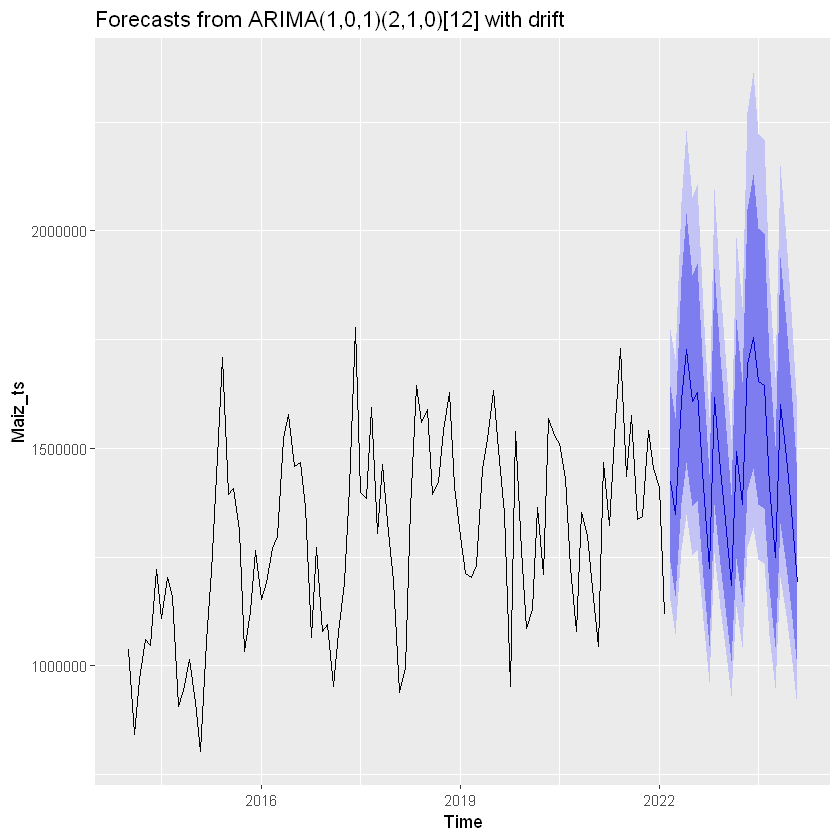

In [9]:
autoplot(Pronostico)

In [17]:
sd(Maiz_ts)
sd(Maiz_ts_diff)
sd(Maiz_ts_diff_2)

[1] 219999.1

[1] 193091.7

[1] 296828.7

**Como encontrar d**

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que oscila alrededor de una media bien definida y la gráfica de la función de correlación llega a $0$ con bastante rápidez.

Si las autocorrelaciones son positivas para muchos retrasos ($10$ o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación del retraso $1$, es decir, $\varphi _{1}$ en si es demasiaado negativa, entonces la serie probablemente está sobrediferenciada.

Si es el caso en que no puede realmente decidir entre dos órdenes de diferenciación, elija el orden de la menor desviación estándar  en la serie diferenciada.


Autocorrelations of series 'ts(Maiz_ts_diff)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.187 -0.051 -0.006 -0.184 -0.101  0.116 -0.121 -0.095 -0.097  0.042 
    11     12     13     14     15     16     17     18     19     20     21 
-0.083  0.486  0.063 -0.051 -0.115 -0.026 -0.116  0.111 -0.098 -0.069 -0.093 
    22     23     24     25     26     27     28     29     30     31     32 
-0.010  0.019  0.315 -0.008  0.071 -0.087 -0.147  0.054  0.080 -0.120 -0.022 
    33     34     35     36 
-0.143 -0.003  0.072  0.249 

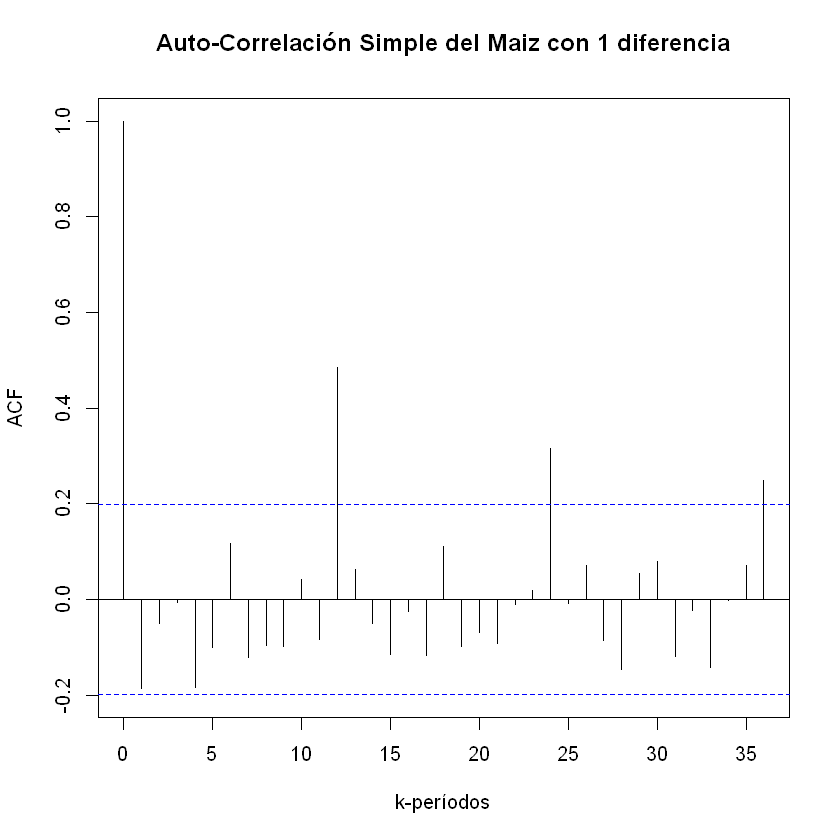

In [30]:
Maiz_ts_diff <- diff(Maiz_ts, differences =1) #Diferencia la serie original 1 vez
(acf(ts(Maiz_ts_diff), lag.max=36, 
     main = "Auto-Correlación Simple del Maiz con 1 diferencia",
xlab ="k-períodos"))

En la gráfica de la serie con $1$ diferenciación vemos que existen ($10$ o más) autocorrelaciones positivas, entonces se sugiere que la serie necesita una mayor diferenciación.


Autocorrelations of series 'ts(Maiz_ts_diff_2)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.549  0.037  0.103 -0.114 -0.072  0.212 -0.131  0.023 -0.051  0.100 
    11     12     13     14     15     16     17     18     19     20     21 
-0.281  0.405 -0.124 -0.021 -0.052  0.061 -0.150  0.198 -0.102  0.017 -0.023 
    22     23     24     25     26     27     28     29     30     31     32 
 0.006 -0.107  0.262 -0.179  0.097 -0.007 -0.150  0.079  0.100 -0.121  0.087 
    33     34     35     36 
-0.094  0.011 -0.040  0.173 

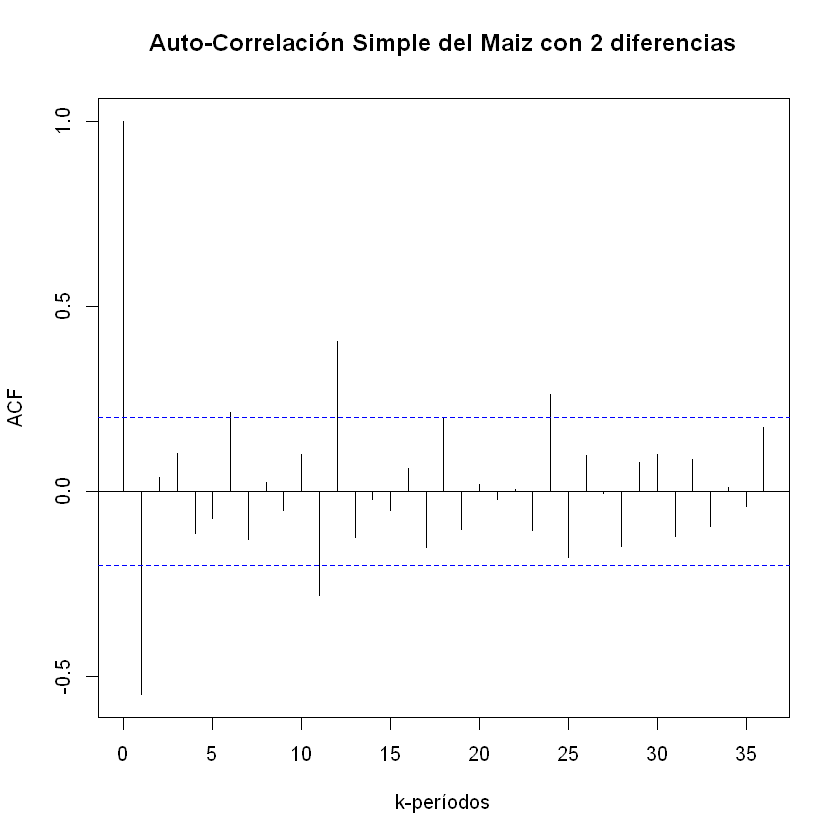

In [31]:
(acf(ts(Maiz_ts_diff_2), lag.max=36, 
     main = "Auto-Correlación Simple del Maiz con 2 diferencias",
xlab ="k-períodos"))

En la gráfica de la serie con $2$ diferenciaciones vemos que ($\varphi =-0.549$), lo cual es demasiado negativo, esto nos quiere dar a decir que la serie esta sobrediferenciada. Con lo anterior, escogeremos la serie diferenciada con menor desviación estándar.

In [33]:
sd(Maiz_ts_diff) #Desvación estándar de la serie con 1 diferencia ordinarias
sd(Maiz_ts_diff_2) #Desviación estándar de la serie con 2 diferencias ordinarias

[1] 193091.7

[1] 296828.7

Observamos que la Desviación estándar menor es la de la serie con $1$ diferenciación, entonces tendremos que $d=1$.

**SELECCIONAR EL ORDEN p DEL MODELO AR(p) EN FUNCIÓN DE LOS PICOS SIGNIFICATIVOS DEL GRÁFICO PACF.** 

OJO: Se debe tener la serie estacionaria.


Partial autocorrelations of series 'ts(Maiz_ts_diff)', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.187 -0.089 -0.035 -0.206 -0.200  0.018 -0.149 -0.232 -0.313 -0.170 -0.344 
    12     13     14     15     16     17     18     19     20     21     22 
 0.241  0.161  0.076 -0.153  0.022 -0.006  0.063 -0.055 -0.021 -0.012 -0.093 
    23     24     25     26     27     28     29     30     31     32     33 
-0.027  0.064 -0.095  0.005  0.069 -0.142  0.040  0.047  0.020 -0.043 -0.087 
    34     35     36 
-0.021  0.047  0.081 

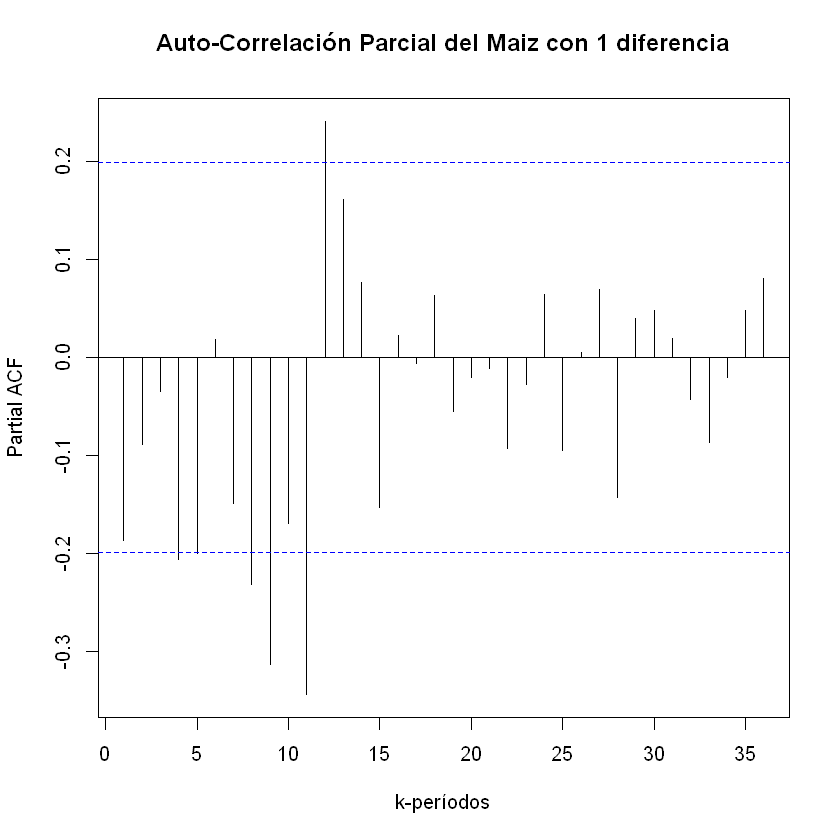

In [39]:
(pacf(ts(Maiz_ts_diff), lag.max=36, 
     main = "Auto-Correlación Parcial del Maiz con 1 diferencia",
xlab ="k-períodos"))

**SELECCIONAR EL ORDEN q PARA EL MODELO MA(q) DE ACF.**

OJO: La serie ya debe ser estacionaria.


Autocorrelations of series 'ts(Maiz_ts_diff)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.187 -0.051 -0.006 -0.184 -0.101  0.116 -0.121 -0.095 -0.097  0.042 
    11     12     13     14     15     16     17     18     19     20     21 
-0.083  0.486  0.063 -0.051 -0.115 -0.026 -0.116  0.111 -0.098 -0.069 -0.093 
    22     23     24     25     26     27     28     29     30     31     32 
-0.010  0.019  0.315 -0.008  0.071 -0.087 -0.147  0.054  0.080 -0.120 -0.022 
    33     34     35     36 
-0.143 -0.003  0.072  0.249 

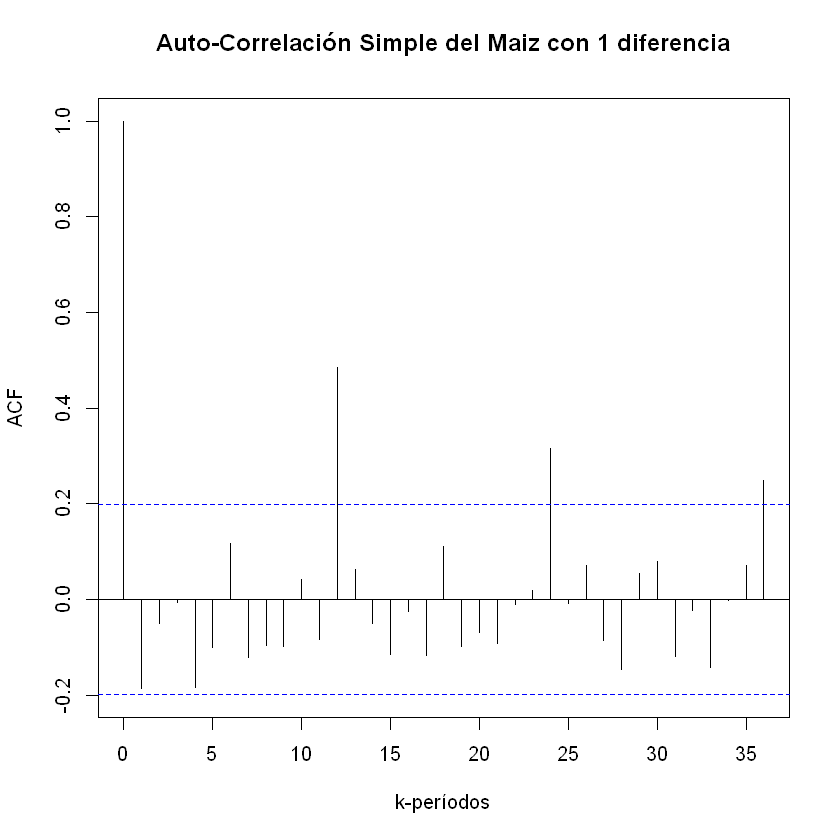

In [40]:
(acf(ts(Maiz_ts_diff), lag.max=36, 
     main = "Auto-Correlación Simple del Maiz con 1 diferencia",
xlab ="k-períodos"))